In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv


In [44]:
import pandas as pd
data=pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")
data

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
36515,2023-12-31,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
36516,2023-12-31,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
36517,2023-12-31,Tomato,Sandy,6.75,6.030148,80.000000,9.409497,50.0,36.0,30.0,0.000000,33.833333
36518,2023-12-31,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [45]:
# Drop rows where crop_yield is 0.0
data = data[data['Crop_Yield'] != 0.0]

# Reset the index after dropping
data = data.reset_index(drop=True)

# Display result
print("Rows after removing zero crop_yield values:", len(data))
print(data.head())

Rows after removing zero crop_yield values: 25495
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
1  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
2  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   
3  2014-01-01    Cotton     Sandy     6.75    14.826739  80.000000   
4  2014-01-01    Tomato      Clay     6.25    18.323272  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0    8.591577  84.0  66.0  50.0  104.871310     66.666667  
1    2.682683  50.0  40.0  30.0   58.939796     35.000000  
2    7.696070  49.5  45.0  38.5   32.970413     22.166667  
3   10.366657  55.0  44.0  36.0   29.356115     39.375000  
4    8.198084  60.0  45.0  40.0   22.221375     42.291667  


In [46]:
data.shape

(25495, 12)

In [47]:
data.isnull()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
25490,False,False,False,False,False,False,False,False,False,False,False,False
25491,False,False,False,False,False,False,False,False,False,False,False,False
25492,False,False,False,False,False,False,False,False,False,False,False,False
25493,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
data.dtypes

Date             object
Crop_Type        object
Soil_Type        object
Soil_pH         float64
Temperature     float64
Humidity        float64
Wind_Speed      float64
N               float64
P               float64
K               float64
Crop_Yield      float64
Soil_Quality    float64
dtype: object

In [49]:
data.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,25495.00000,25495.000000,25495.000000,25495.000000,25495.000000,25495.000000,25495.000000,25495.000000,25495.000000
mean,6.60051,21.487087,76.926951,10.002469,66.011649,53.010492,42.017062,38.501749,37.504607
std,0.81741,5.499282,3.764779,3.002739,10.906079,8.815804,8.528551,22.396534,17.705394
min,5.50000,10.000340,65.004056,-3.388906,45.000000,36.000000,27.000000,0.001761,13.291667
25%,6.25000,17.322668,74.458652,7.966567,58.500000,45.000000,35.000000,20.971841,22.500000
50%,6.50000,21.328478,78.671522,9.968398,65.000000,54.000000,42.000000,37.742150,35.583333
75%,6.75000,25.541348,80.000000,12.028991,71.500000,60.000000,49.500000,53.209264,49.291667
max,8.00000,34.995944,80.000000,20.799435,91.000000,72.000000,60.000000,136.711982,74.333333


In [50]:
data.isnull().sum()

Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

In [51]:
data.duplicated().sum()

0

In [52]:
data['Crop_Type'].unique()

array(['Corn', 'Barley', 'Soybean', 'Cotton', 'Tomato', 'Potato',
       'Sunflower', 'Wheat', 'Sugarcane', 'Rice'], dtype=object)

In [53]:
#data.groupby("Crop_Type")['Soil_Type'].mean()

In [54]:
data.columns=['date','crop_type','soil_type','soil_pH','temperature','humidity','wind_speed','n','p','k','crop_yield','soil_quality']

In [55]:
data

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667
...,...,...,...,...,...,...,...,...,...,...,...,...
25490,2023-12-31,Barley,Clay,6.25,11.617771,80.000000,14.700485,60.0,50.0,40.0,13.069169,43.750000
25491,2023-12-31,Cotton,Clay,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667
25492,2023-12-31,Sugarcane,Peaty,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667
25493,2023-12-31,Potato,Peaty,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333


In [56]:
data['soil_type'].value_counts()

soil_type
Saline    5129
Clay      5123
Peaty     5115
Loamy     5069
Sandy     5059
Name: count, dtype: int64

In [57]:
data['crop_type'].value_counts()

crop_type
Rice         2569
Tomato       2566
Soybean      2565
Potato       2559
Sugarcane    2556
Sunflower    2547
Wheat        2547
Cotton       2541
Corn         2524
Barley       2521
Name: count, dtype: int64

In [58]:
import matplotlib.pyplot  as plt

In [59]:
data.head()

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


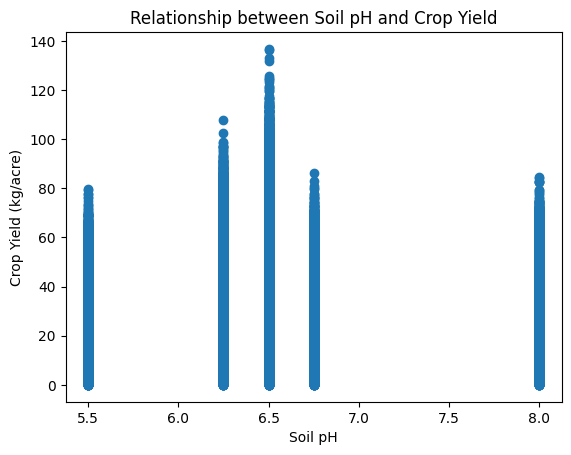

In [60]:
plt.scatter(data["soil_pH"], data["crop_yield"])
plt.xlabel("Soil pH")
plt.ylabel("Crop Yield (kg/acre)")
plt.title("Relationship between Soil pH and Crop Yield")
plt.show()


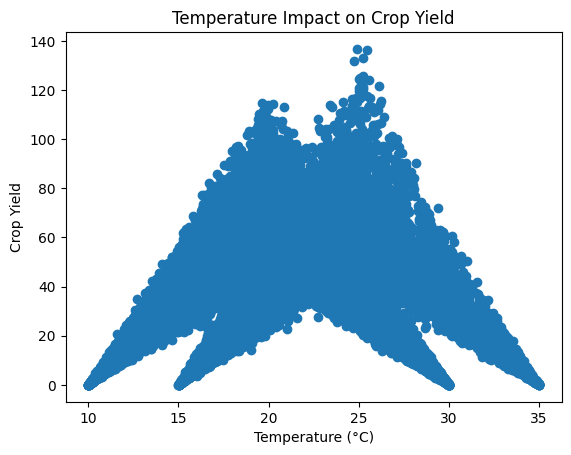

In [61]:
plt.scatter(data["temperature"], data["crop_yield"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Crop Yield")
plt.title("Temperature Impact on Crop Yield")
plt.show()


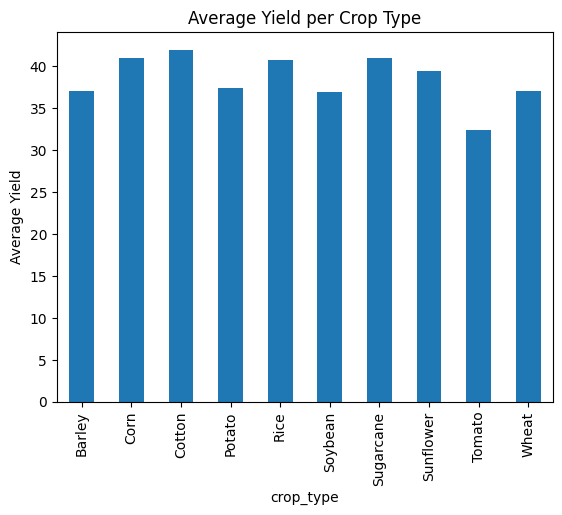

In [62]:
avg_yield = data.groupby("crop_type")["crop_yield"].mean()
avg_yield.plot(kind="bar")
plt.ylabel("Average Yield")
plt.title("Average Yield per Crop Type")
plt.show()


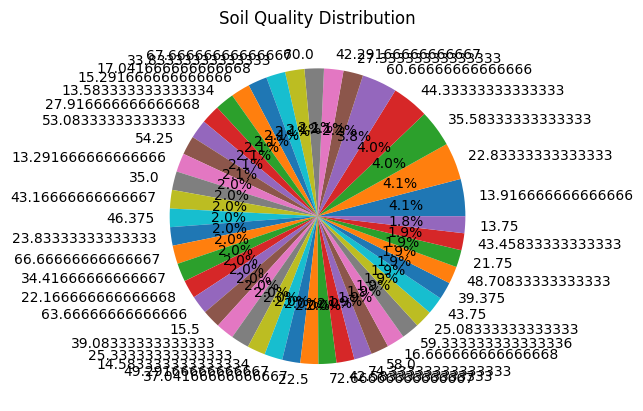

In [63]:
data["soil_quality"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Soil Quality Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

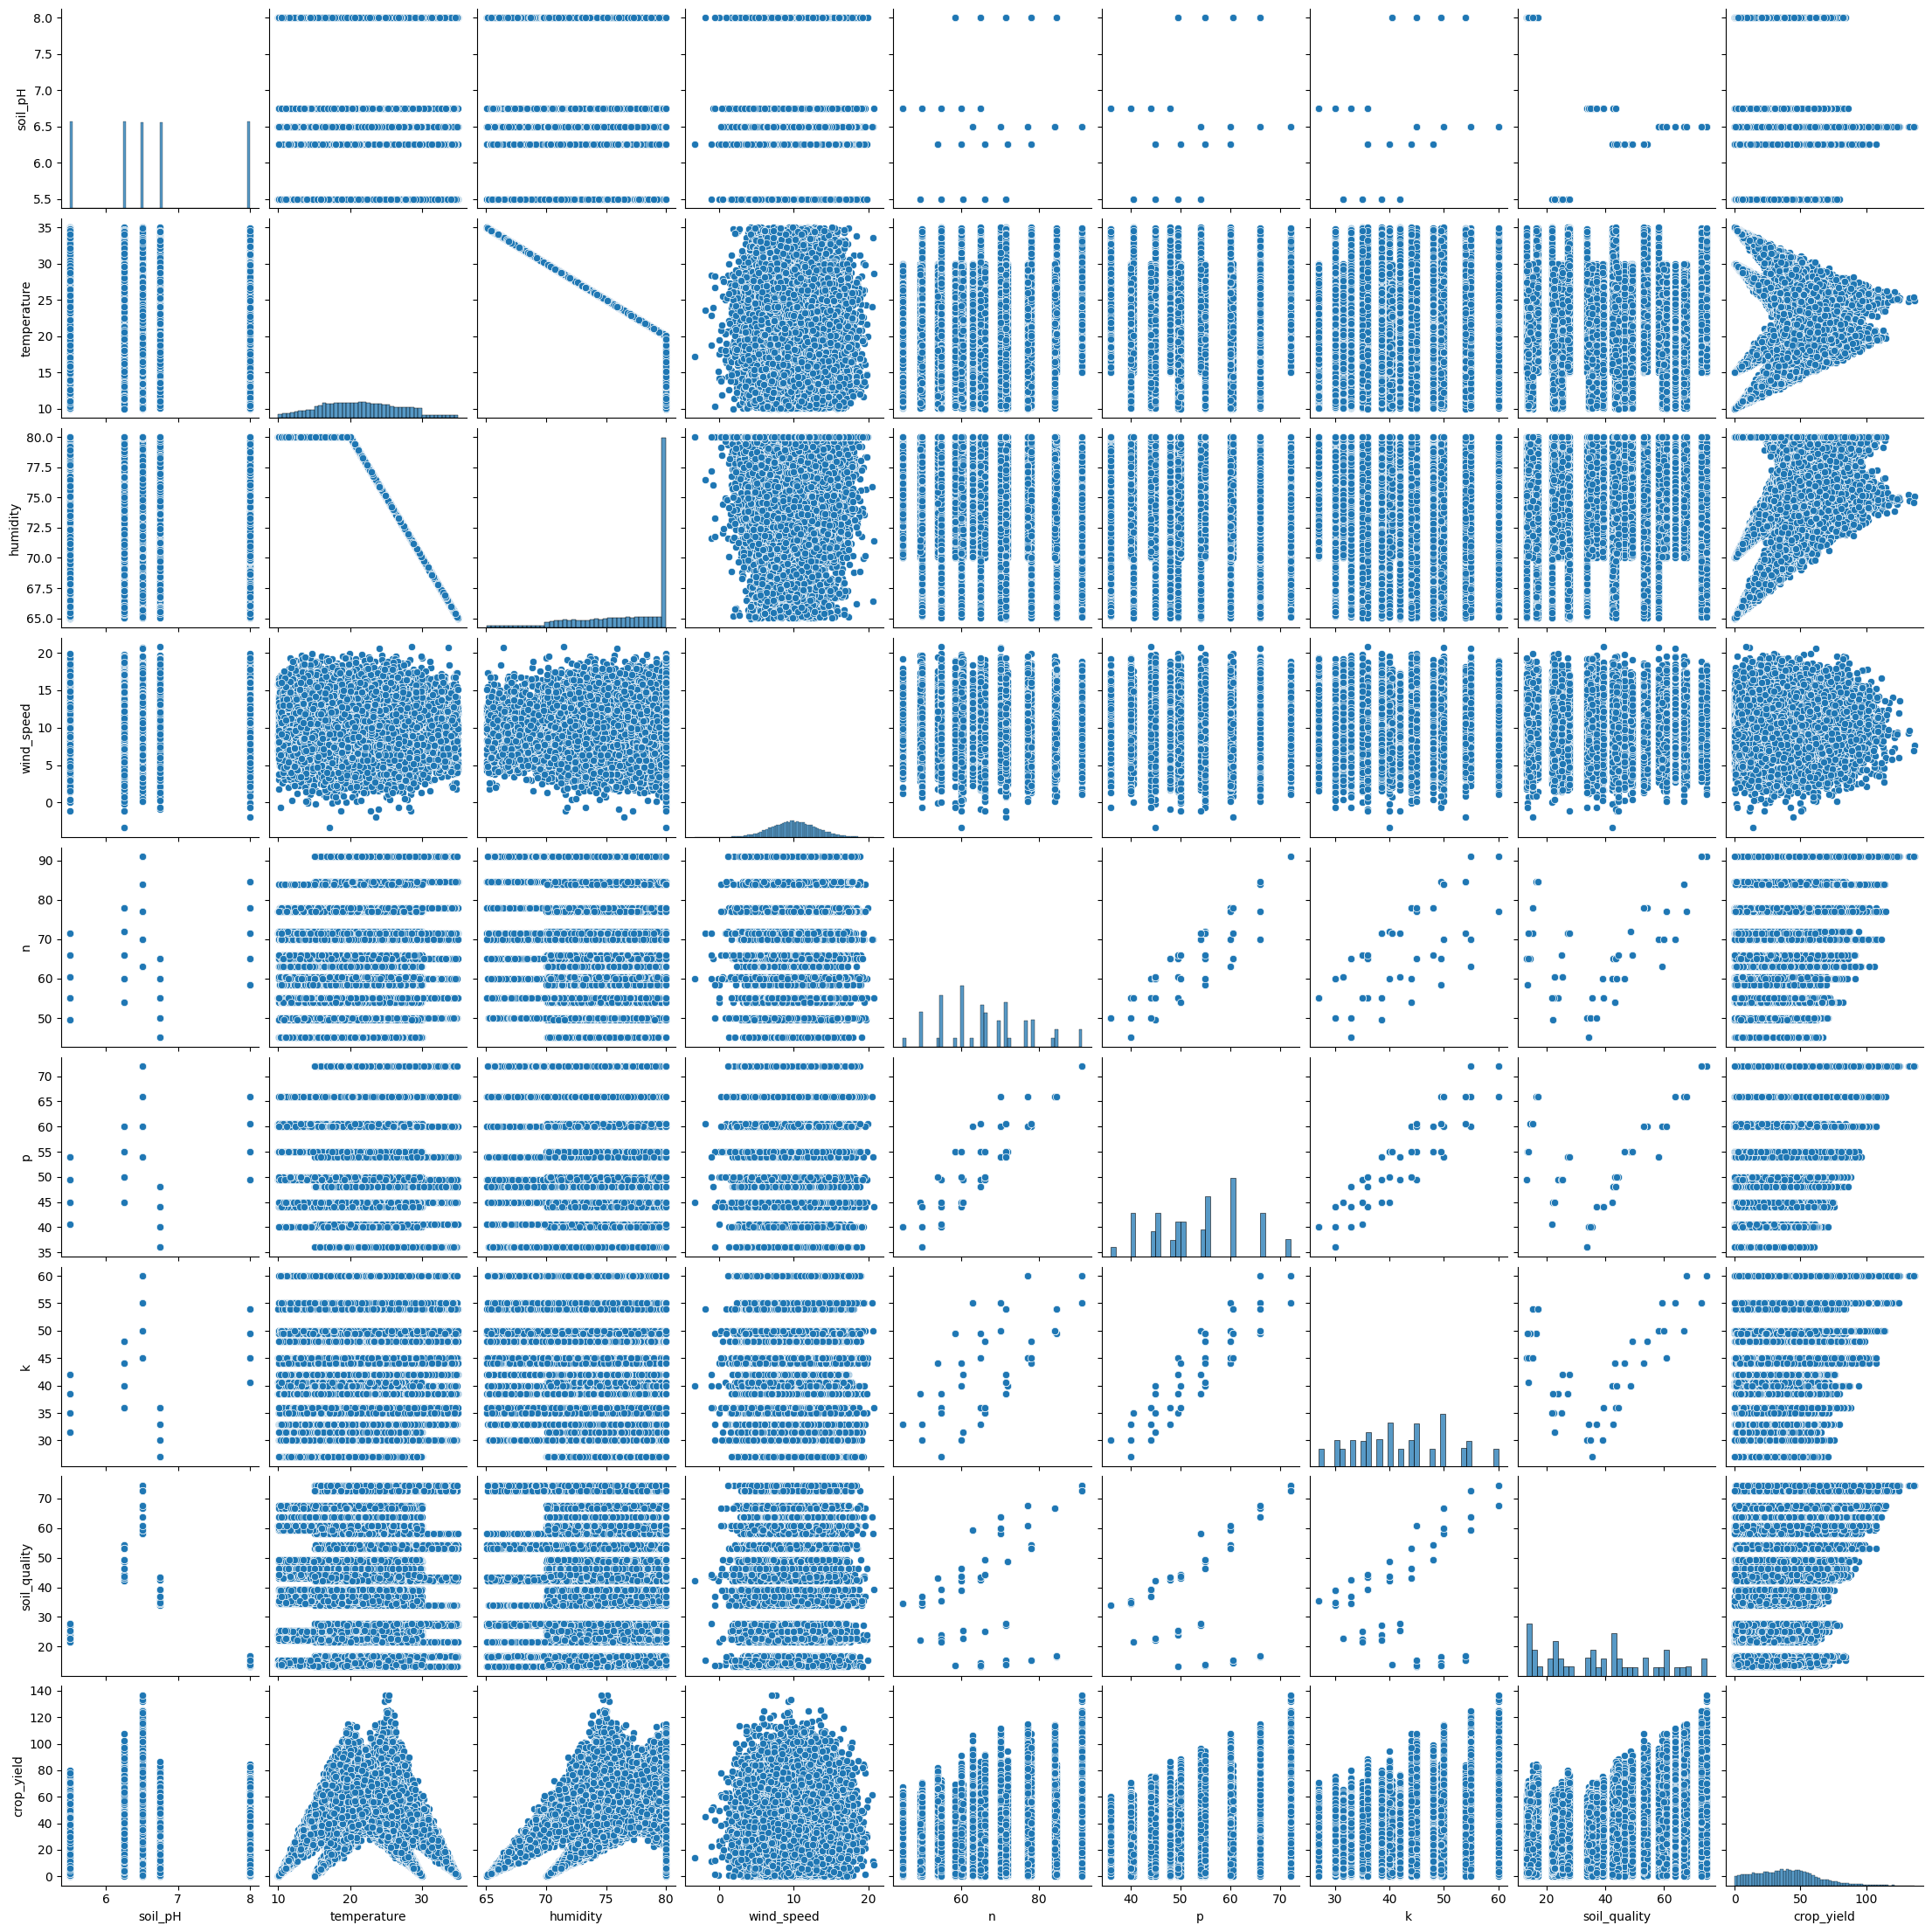

In [64]:
import warnings
warnings.filterwarnings("ignore")  # suppress all warnings globally
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['soil_pH','temperature','humidity','wind_speed','n','p','k','soil_quality','crop_yield']])
plt.show()

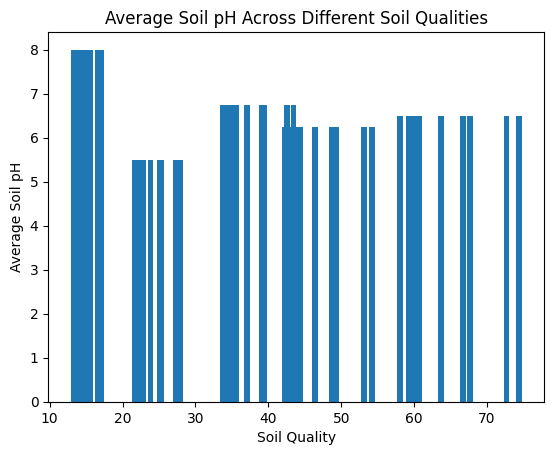

In [65]:
avg_pH = data.groupby("soil_quality")["soil_pH"].mean()
plt.bar(avg_pH.index, avg_pH.values)
plt.xlabel("Soil Quality")
plt.ylabel("Average Soil pH")
plt.title("Average Soil pH Across Different Soil Qualities")
plt.show()


In [66]:
data.head()

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [67]:
#LEAVE-ONE-OUT ENCODING
import category_encoders as ce

# Target column
y = data['crop_yield']

# Apply Leave-One-Out Encoding
encoder = ce.LeaveOneOutEncoder(cols=['crop_type', 'soil_type'])
data_looencode = encoder.fit_transform(data, y)

# Show results
print(data_looencode[['crop_type', 'soil_type', 'crop_yield']].head())


   crop_type  soil_type  crop_yield
0  40.966442  52.501041  104.871310
1  37.007957  33.402460   58.939796
2  36.923115  31.327259   32.970413
3  41.984588  33.408309   29.356115
4  32.445278  41.611338   22.221375


In [68]:
data.head()

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [69]:
data_looencode.head()

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,40.966442,52.501041,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,37.007957,33.402460,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,36.923115,31.327259,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,41.984588,33.408309,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,32.445278,41.611338,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [70]:
print(data_looencode.head())

         date  crop_type  soil_type  soil_pH  temperature   humidity  \
0  2014-01-01  40.966442  52.501041     6.50    20.052576  79.947424   
1  2014-01-01  37.007957  33.402460     6.75    19.751848  80.000000   
2  2014-01-01  36.923115  31.327259     5.50    16.110395  80.000000   
3  2014-01-01  41.984588  33.408309     6.75    14.826739  80.000000   
4  2014-01-01  32.445278  41.611338     6.25    18.323272  80.000000   

   wind_speed     n     p     k  crop_yield  soil_quality  
0    8.591577  84.0  66.0  50.0  104.871310     66.666667  
1    2.682683  50.0  40.0  30.0   58.939796     35.000000  
2    7.696070  49.5  45.0  38.5   32.970413     22.166667  
3   10.366657  55.0  44.0  36.0   29.356115     39.375000  
4    8.198084  60.0  45.0  40.0   22.221375     42.291667  


In [71]:
data_looencode.to_csv("leaveoneout_encoded")

In [72]:
#StandardScaler for Leave-One-Out-Encoded data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numerical columns to scale
num_cols = ['soil_pH', 'temperature', 'humidity','wind_speed', 'n', 'p', 'k', 'soil_quality']

# Step 2: Create a copy of the encoded data for StandardScaler
data_std_scaled = data_looencode.copy()

# Step 3: Apply StandardScaler
scaler = StandardScaler()
data_std_scaled[num_cols] = scaler.fit_transform(data_std_scaled[num_cols])

# Step 4: Show both datasets to confirm
print("Original LOO Encoded Data (first 5 rows):")
print(data_looencode.head())

print("\nStandard Scaled Data (first 5 rows):")
print(data_std_scaled.head())

# Optional: Verify scaling effect
print("\nMean after Standard Scaling:\n", data_std_scaled[num_cols].mean())
print("\nStandard deviation after Standard Scaling:\n", data_std_scaled[num_cols].std())


Original LOO Encoded Data (first 5 rows):
         date  crop_type  soil_type  soil_pH  temperature   humidity  \
0  2014-01-01  40.966442  52.501041     6.50    20.052576  79.947424   
1  2014-01-01  37.007957  33.402460     6.75    19.751848  80.000000   
2  2014-01-01  36.923115  31.327259     5.50    16.110395  80.000000   
3  2014-01-01  41.984588  33.408309     6.75    14.826739  80.000000   
4  2014-01-01  32.445278  41.611338     6.25    18.323272  80.000000   

   wind_speed     n     p     k  crop_yield  soil_quality  
0    8.591577  84.0  66.0  50.0  104.871310     66.666667  
1    2.682683  50.0  40.0  30.0   58.939796     35.000000  
2    7.696070  49.5  45.0  38.5   32.970413     22.166667  
3   10.366657  55.0  44.0  36.0   29.356115     39.375000  
4    8.198084  60.0  45.0  40.0   22.221375     42.291667  

Standard Scaled Data (first 5 rows):
         date  crop_type  soil_type   soil_pH  temperature  humidity  \
0  2014-01-01  40.966442  52.501041 -0.122964    -0.260

In [73]:
data_std_scaled

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,40.966442,52.501041,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,104.871310,1.647104
1,2014-01-01,37.007957,33.402460,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,58.939796,-0.141463
2,2014-01-01,36.923115,31.327259,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,32.970413,-0.866303
3,2014-01-01,41.984588,33.408309,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,29.356115,0.105642
4,2014-01-01,32.445278,41.611338,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,22.221375,0.270378
...,...,...,...,...,...,...,...,...,...,...,...,...
25490,2023-12-31,37.026160,41.613125,-0.428814,-1.794691,0.816279,1.564607,-0.551231,-0.341495,-0.236512,13.069169,0.352746
25491,2023-12-31,41.967278,41.601361,-0.428814,-0.354332,0.816279,-2.110050,-0.001068,0.225680,0.701532,73.323885,0.665746
25492,2023-12-31,40.999772,31.326036,-1.346363,-0.076148,0.532502,-0.402119,0.503248,0.112245,-0.002001,39.226521,-0.541537
25493,2023-12-31,37.421843,31.332520,-1.346363,-1.892562,0.816279,0.322011,-0.505384,-0.908669,-1.233184,6.067881,-0.828649


In [74]:
data_std_scaled.to_csv("data_loo_stdscaler",index=False)
print("Successfully saved")

Successfully saved


In [75]:
#Min-Max scaler for Leave-One-Out encoding
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select numerical columns
num_cols = [ 'soil_pH', 'temperature', 'humidity','wind_speed', 'n', 'p', 'k', 'soil_quality']

# Step 2: Create a copy of the encoded dataset for MinMax scaling
data_minmax_scaled = data_looencode.copy()

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
data_minmax_scaled[num_cols] = scaler.fit_transform(data_minmax_scaled[num_cols])

# Step 4: Display results
print("Original LOO Encoded Data (first 5 rows):")
print(data_looencode.head())

print("\nMinMax Scaled Data (first 5 rows):")
print(data_minmax_scaled.head())

Original LOO Encoded Data (first 5 rows):
         date  crop_type  soil_type  soil_pH  temperature   humidity  \
0  2014-01-01  40.966442  52.501041     6.50    20.052576  79.947424   
1  2014-01-01  37.007957  33.402460     6.75    19.751848  80.000000   
2  2014-01-01  36.923115  31.327259     5.50    16.110395  80.000000   
3  2014-01-01  41.984588  33.408309     6.75    14.826739  80.000000   
4  2014-01-01  32.445278  41.611338     6.25    18.323272  80.000000   

   wind_speed     n     p     k  crop_yield  soil_quality  
0    8.591577  84.0  66.0  50.0  104.871310     66.666667  
1    2.682683  50.0  40.0  30.0   58.939796     35.000000  
2    7.696070  49.5  45.0  38.5   32.970413     22.166667  
3   10.366657  55.0  44.0  36.0   29.356115     39.375000  
4    8.198084  60.0  45.0  40.0   22.221375     42.291667  

MinMax Scaled Data (first 5 rows):
         date  crop_type  soil_type  soil_pH  temperature  humidity  \
0  2014-01-01  40.966442  52.501041      0.4     0.402160 

In [76]:
data_minmax_scaled

,date,crop_type,soil_type,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality
0,2014-01-01,40.966442,52.501041,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,104.871310,0.874403
1,2014-01-01,37.007957,33.402460,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,58.939796,0.355631
2,2014-01-01,36.923115,31.327259,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,32.970413,0.145392
3,2014-01-01,41.984588,33.408309,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,29.356115,0.427304
4,2014-01-01,32.445278,41.611338,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,22.221375,0.475085
...,...,...,...,...,...,...,...,...,...,...,...,...
25490,2023-12-31,37.026160,41.613125,0.3,0.064709,1.000000,0.747856,0.326087,0.388889,0.393939,13.069169,0.498976
25491,2023-12-31,41.967278,41.601361,0.3,0.381596,1.000000,0.291693,0.456522,0.527778,0.636364,73.323885,0.589761
25492,2023-12-31,40.999772,31.326036,0.0,0.442798,0.928758,0.503711,0.576087,0.500000,0.454545,39.226521,0.239590
25493,2023-12-31,37.421843,31.332520,0.0,0.043176,1.000000,0.593603,0.336957,0.250000,0.136364,6.067881,0.156314


In [77]:
data_minmax_scaled.to_csv("data_loo_minmax")
print("Saved successfull")

Saved successfull


In [78]:
#ONE-HOT ENCODING
import pandas as pd

# Columns to one-hot encode
categorical_cols = ['crop_type', 'soil_type']

# Apply One-Hot Encoding
data_onehotencoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)  # drop_first=True if you want to avoid dummy variable trap

# Show results
print(data_onehotencoded.head())

         date  soil_pH  temperature   humidity  wind_speed     n     p     k  \
0  2014-01-01     6.50    20.052576  79.947424    8.591577  84.0  66.0  50.0   
1  2014-01-01     6.75    19.751848  80.000000    2.682683  50.0  40.0  30.0   
2  2014-01-01     5.50    16.110395  80.000000    7.696070  49.5  45.0  38.5   
3  2014-01-01     6.75    14.826739  80.000000   10.366657  55.0  44.0  36.0   
4  2014-01-01     6.25    18.323272  80.000000    8.198084  60.0  45.0  40.0   

   crop_yield  soil_quality  ...  crop_type_Soybean  crop_type_Sugarcane  \
0  104.871310     66.666667  ...              False                False   
1   58.939796     35.000000  ...              False                False   
2   32.970413     22.166667  ...               True                False   
3   29.356115     39.375000  ...              False                False   
4   22.221375     42.291667  ...              False                False   

   crop_type_Sunflower  crop_type_Tomato  crop_type_Wheat  soi

In [79]:
data_onehotencoded

,date,soil_pH,temperature,humidity,wind_speed,n,p,k,crop_yield,soil_quality,...,crop_type_Soybean,crop_type_Sugarcane,crop_type_Sunflower,crop_type_Tomato,crop_type_Wheat,soil_type_Clay,soil_type_Loamy,soil_type_Peaty,soil_type_Saline,soil_type_Sandy
0,2014-01-01,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,...,False,False,False,False,False,False,True,False,False,False
1,2014-01-01,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,...,False,False,False,False,False,False,False,False,False,True
2,2014-01-01,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,...,True,False,False,False,False,False,False,True,False,False
3,2014-01-01,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,...,False,False,False,False,False,False,False,False,False,True
4,2014-01-01,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25490,2023-12-31,6.25,11.617771,80.000000,14.700485,60.0,50.0,40.0,13.069169,43.750000,...,False,False,False,False,False,True,False,False,False,False
25491,2023-12-31,6.25,19.538555,80.000000,3.666664,66.0,55.0,48.0,73.323885,49.291667,...,False,False,False,False,False,True,False,False,False,False
25492,2023-12-31,5.50,21.068336,78.931664,8.795036,71.5,54.0,42.0,39.226521,27.916667,...,False,True,False,False,False,False,False,True,False,False
25493,2023-12-31,5.50,11.079561,80.000000,10.969366,60.5,45.0,31.5,6.067881,22.833333,...,False,False,False,False,False,False,False,True,False,False


In [80]:
#StandardScaler for One-Hot-Encoded data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numerical columns to scale
num_cols = ['soil_pH', 'temperature', 'humidity','wind_speed', 'n', 'p', 'k', 'soil_quality']

# Step 2: Create a copy of the encoded data for StandardScaler
data_one_hot_std_scaled = data_onehotencoded.copy()

# Step 3: Apply StandardScaler
scaler = StandardScaler()
data_one_hot_std_scaled[num_cols] = scaler.fit_transform(data_one_hot_std_scaled[num_cols])

# Step 4: Show both datasets to confirm
print("Original LOO Encoded Data (first 5 rows):")
print(data_onehotencoded.head())

print("\nStandard Scaled Data (first 5 rows):")
print(data_one_hot_std_scaled.head())

# Optional: Verify scaling effect
print("\nMean after Standard Scaling:\n", data_std_scaled[num_cols].mean())
print("\nStandard deviation after Standard Scaling:\n", data_std_scaled[num_cols].std())


Original LOO Encoded Data (first 5 rows):
         date  soil_pH  temperature   humidity  wind_speed     n     p     k  \
0  2014-01-01     6.50    20.052576  79.947424    8.591577  84.0  66.0  50.0   
1  2014-01-01     6.75    19.751848  80.000000    2.682683  50.0  40.0  30.0   
2  2014-01-01     5.50    16.110395  80.000000    7.696070  49.5  45.0  38.5   
3  2014-01-01     6.75    14.826739  80.000000   10.366657  55.0  44.0  36.0   
4  2014-01-01     6.25    18.323272  80.000000    8.198084  60.0  45.0  40.0   

   crop_yield  soil_quality  ...  crop_type_Soybean  crop_type_Sugarcane  \
0  104.871310     66.666667  ...              False                False   
1   58.939796     35.000000  ...              False                False   
2   32.970413     22.166667  ...               True                False   
3   29.356115     39.375000  ...              False                False   
4   22.221375     42.291667  ...              False                False   

   crop_type_Sunflow

In [81]:
data_one_hot_std_scaled.to_csv("data_onehot_stdscaled")
print("Saved sucessfully")

Saved sucessfully


In [82]:
#Min-Max scaler for One-Hot encoding
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select numerical columns
num_cols = [ 'soil_pH', 'temperature', 'humidity','wind_speed', 'n', 'p', 'k', 'soil_quality']

# Step 2: Create a copy of the encoded dataset for MinMax scaling
data_onehot_minmax_scaled = data_onehotencoded.copy()

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
data_onehot_minmax_scaled[num_cols] = scaler.fit_transform(data_onehot_minmax_scaled[num_cols])

# Step 4: Display results
print("Original LOO Encoded Data (first 5 rows):")
print(data_onehotencoded.head())

print("\nMinMax Scaled Data (first 5 rows):")
print(data_onehot_minmax_scaled.head())

Original LOO Encoded Data (first 5 rows):
         date  soil_pH  temperature   humidity  wind_speed     n     p     k  \
0  2014-01-01     6.50    20.052576  79.947424    8.591577  84.0  66.0  50.0   
1  2014-01-01     6.75    19.751848  80.000000    2.682683  50.0  40.0  30.0   
2  2014-01-01     5.50    16.110395  80.000000    7.696070  49.5  45.0  38.5   
3  2014-01-01     6.75    14.826739  80.000000   10.366657  55.0  44.0  36.0   
4  2014-01-01     6.25    18.323272  80.000000    8.198084  60.0  45.0  40.0   

   crop_yield  soil_quality  ...  crop_type_Soybean  crop_type_Sugarcane  \
0  104.871310     66.666667  ...              False                False   
1   58.939796     35.000000  ...              False                False   
2   32.970413     22.166667  ...               True                False   
3   29.356115     39.375000  ...              False                False   
4   22.221375     42.291667  ...              False                False   

   crop_type_Sunflow

In [83]:
data_onehot_minmax_scaled.to_csv("data_onehot_minmax",index=False)
print("Saved successfully")

Saved successfully



data_onehot_minmax 

data_onehot_stdscaled  

data_loo_stdscaler 

data_loo_minmax
